In [2]:
import json
import pandas as pd
import numpy as np
from textblob import TextBlob
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [79]:
colors = ["#6eccf4", "#F9A124"]
colors2 = ["#ff6b6b", "#5c7cfa"]

# Preporcessing

In [4]:
data = []
with open('data1.json', 'r', encoding='utf-8') as file:
    lines = file.readlines()
for line in lines:
    data.append(json.loads(line))
    
sage_data = []
with open('data2.json', 'r', encoding='utf-8') as file:
    lines = file.readlines()
for line in lines:
    sage_data.append(json.loads(line))

In [5]:
start_time = []
end_time = []
for d in data:
    start_time.append(d["start_time"]["$date"])
    end_time.append(d["end_time"]["$date"])

In [6]:
no_sages = [1, 4,6,9, 11, 13,16, 18,19, 23, 25, 27, 29,31, 33, 35, 37, 39, 40]
with_sages = [2, 5,7,10, 12, 14,17, 20, 21, 24,26, 28, 30, 32, 34, 36, 38, 41,42]

In [7]:
events = set()
for i in with_sages:
    d = data[i]["playdata"]
    for p in d:
        events.add(p["event_type"])
events

{'continue-character',
 'continue-groupchat',
 'continue-options',
 'generate-character',
 'generate-groupchat',
 'generate-options',
 'story-description'}

# Conversation Analysis

In [8]:
single_without = []
single_with = []
multi_without = []
multi_with = []

for i in no_sages:
    d = data[i]["playdata"]
    for p in d:
        if p["event_type"] == "generate-character" and "messages" in p:
            single_without.append(p["messages"])   
        elif p["event_type"] == "generate-groupchat" and "messages" in p:
            multi_without.append(p["messages"])   

for i in with_sages:
    d = data[i]["playdata"]
    for p in d:
        if p["event_type"] == "generate-character" and "messages" in p:
            single_with.append(p["messages"])
        elif p["event_type"] == "generate-groupchat" and "messages" in p:
            multi_with.append(p["messages"]) 

In [9]:
def get_user_message_length_single(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["role"] == "user"] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

roles = [ "Harry", "Geralt", "Lin"]
def get_user_message_length_multi(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["speaker"] in roles] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

msg_single_without = get_user_message_length_single(single_without)
msg_single_with = get_user_message_length_single(single_with)
msg_multi_without = get_user_message_length_multi(multi_without)
msg_multi_with = get_user_message_length_multi(multi_with)

msg_lists = {"msg_single_without":msg_single_without, "msg_single_with":msg_single_with, "msg_multi_without":msg_multi_without, "msg_multi_with":msg_multi_with}

In [10]:
# test if normal distribution
# if p is > 0.05, we assume it is normal distribution, therefore, for don't think it belongs to t_test
for cat in msg_lists:
    stat, p = stats.shapiro(msg_lists[cat])
    print("Type:", cat , "   P_value:",p)

Type: msg_single_without    P_value: 7.452060496460078e-11
Type: msg_single_with    P_value: 2.540164523168187e-08
Type: msg_multi_without    P_value: 4.3479293516252016e-13
Type: msg_multi_with    P_value: 4.054536262287911e-09


## length of conversation message

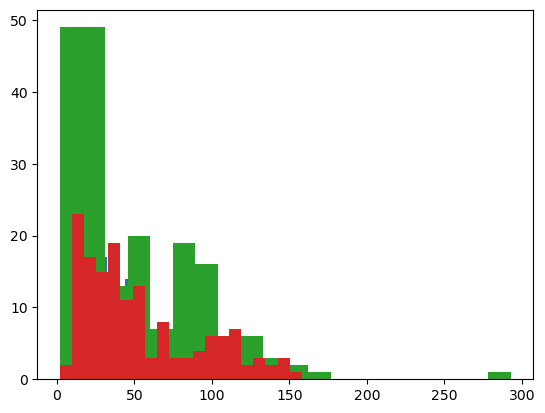

In [103]:
for cat in msg_lists:
    plt.hist(msg_lists[cat], bins = 20)
plt.show()

(array([31., 25., 23., 23., 17., 14.,  9., 14.,  8.,  3.,  4.,  3.,  0.,
         0.,  0.,  1.,  0.,  0.,  2.,  1.]),
 array([  2.,   8.,  14.,  20.,  26.,  32.,  38.,  44.,  50.,  56.,  62.,
         68.,  74.,  80.,  86.,  92.,  98., 104., 110., 116., 122.]),
 <BarContainer object of 20 artists>)

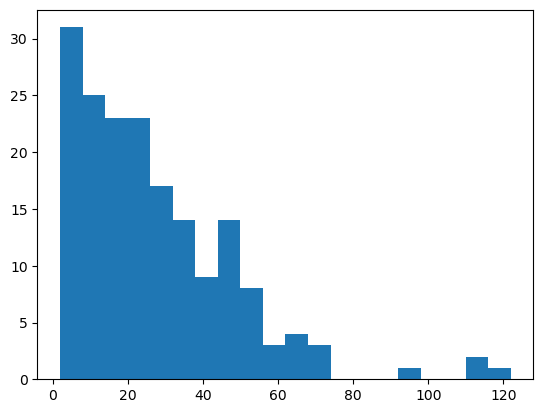

In [104]:
plt.hist(msg_single_without, bins = 20)

(array([29., 12., 17., 10., 10., 12., 11.,  4.,  8.,  5.,  5.,  3.,  2.,
         2.,  2.,  6.,  0.,  1.,  0.,  2.]),
 array([  2.  ,   7.05,  12.1 ,  17.15,  22.2 ,  27.25,  32.3 ,  37.35,
         42.4 ,  47.45,  52.5 ,  57.55,  62.6 ,  67.65,  72.7 ,  77.75,
         82.8 ,  87.85,  92.9 ,  97.95, 103.  ]),
 <BarContainer object of 20 artists>)

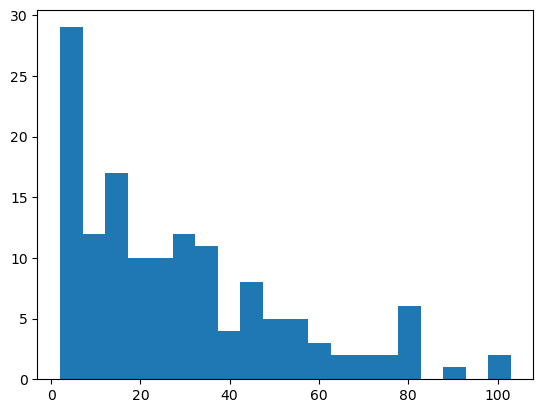

In [44]:
plt.hist(msg_single_with, bins = 20)

(array([49., 49., 13., 20.,  7., 19., 16.,  4.,  6.,  3.,  2.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2.  ,  16.55,  31.1 ,  45.65,  60.2 ,  74.75,  89.3 , 103.85,
        118.4 , 132.95, 147.5 , 162.05, 176.6 , 191.15, 205.7 , 220.25,
        234.8 , 249.35, 263.9 , 278.45, 293.  ]),
 <BarContainer object of 20 artists>)

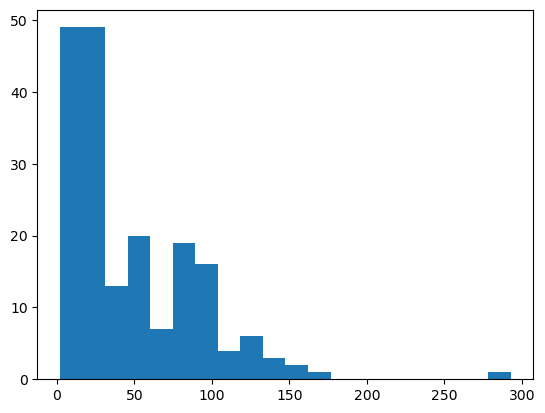

In [45]:
plt.hist(msg_multi_without, bins = 20)

(array([ 2., 23., 17., 15., 19., 11., 13.,  3.,  8.,  3.,  3.,  4.,  6.,
         6.,  7.,  2.,  3.,  2.,  3.,  1.]),
 array([  2. ,   9.8,  17.6,  25.4,  33.2,  41. ,  48.8,  56.6,  64.4,
         72.2,  80. ,  87.8,  95.6, 103.4, 111.2, 119. , 126.8, 134.6,
        142.4, 150.2, 158. ]),
 <BarContainer object of 20 artists>)

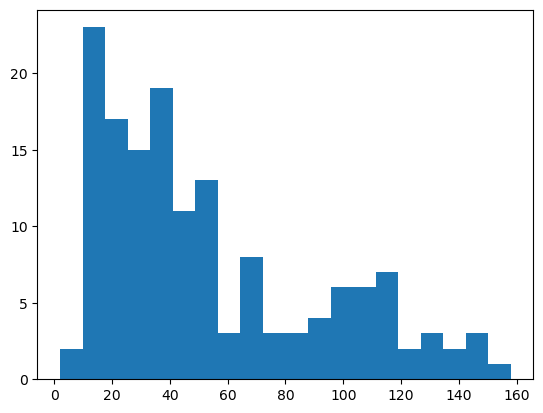

In [46]:
plt.hist(msg_multi_with, bins = 20)

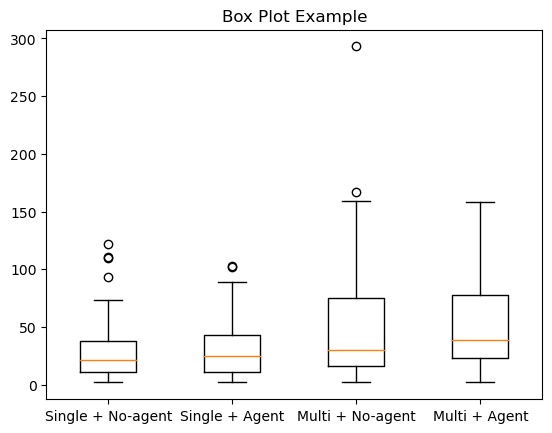

In [158]:
fig, ax = plt.subplots()

# Creating box plot
ax.boxplot([msg_single_without, msg_single_with, msg_multi_without,msg_multi_with])

# Adding titles and labels
ax.set_title('Box Plot Example')
ax.set_xticklabels(['Single + No-agent', 'Single + Agent','Multi + No-agent', 'Multi + Agent'])

# Showing the plot
plt.show()

### agent vs np_agent

In [111]:
print("U-test--agent vs no_agent-- conversation:   ", stats.mannwhitneyu(msg_single_without, msg_single_with) )
print("U-test--agent vs no_agent-- group chat:     ", stats.mannwhitneyu(msg_multi_without, msg_multi_with) )

U-test--agent vs no_agent-- conversation:    MannwhitneyuResult(statistic=12114.5, pvalue=0.5956502466128203)
U-test--agent vs no_agent-- group chat:      MannwhitneyuResult(statistic=12126.0, pvalue=0.014136703046595523)


### conversation_group_chat

In [112]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(msg_single_without, msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(msg_single_with, msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=12018.5, pvalue=1.6090448408022327e-06)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=6189.5, pvalue=6.391351270370662e-10)


## word counts

In [11]:
def get_user_message_words_single(chat):
    user_message_lengths_list = [[len(msg["content"].split(" ")) for msg in msgs[1:] if msg["role"] == "user"] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

roles = [ "Harry", "Geralt", "Lin"]
def get_user_message_words_multi(chat):
    user_message_lengths_list = [[len(msg["content"].split(" ")) for msg in msgs[1:] if msg["speaker"] in roles] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

words_msg_single_without = get_user_message_words_single(single_without)
words_msg_single_with = get_user_message_words_single(single_with)
words_msg_multi_without = get_user_message_words_multi(multi_without)
words_msg_multi_with = get_user_message_words_multi(multi_with)

words_msg_lists = {"words_msg_single_without":words_msg_single_without, "words_msg_single_with":words_msg_single_with, 
                   "words_msg_multi_without":words_msg_multi_without, "words_msg_multi_with":words_msg_multi_with}

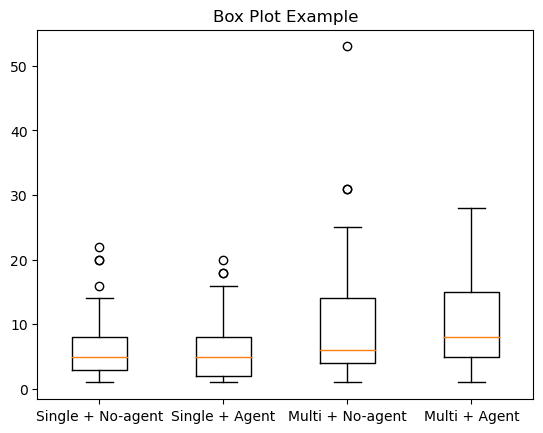

In [160]:
fig, ax = plt.subplots()

# Creating box plot
ax.boxplot([words_msg_single_without, words_msg_single_with, words_msg_multi_without,words_msg_multi_with])

# Adding titles and labels
ax.set_title('Box Plot Example')
ax.set_xticklabels(['Single + No-agent', 'Single + Agent','Multi + No-agent', 'Multi + Agent'])

# Showing the plot
plt.show()

### agent vs no_agent

In [137]:
print("U-test--agent vs no_agent-- conversation:   ", stats.mannwhitneyu(words_msg_single_without, words_msg_single_with) )
print("U-test--agent vs no_agent-- group chat:     ", stats.mannwhitneyu(words_msg_multi_without, words_msg_multi_with) )

U-test--agent vs no_agent-- conversation:    MannwhitneyuResult(statistic=12152.5, pvalue=0.6263956894958227)
U-test--agent vs no_agent-- group chat:      MannwhitneyuResult(statistic=12196.5, pvalue=0.017265950305472323)


### conversation_group_chat

In [138]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(words_msg_single_without, words_msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(words_msg_single_with, words_msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=12376.5, pvalue=8.054889929239053e-06)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=6393.0, pvalue=3.397900112085238e-09)


## Sentiment of message

In [12]:
def get_senti(msgs):
    sentences = []
    polarity = []
    subjectivity = []
    for messages in msgs:
        for msg in messages[1:]:
            if "role" in msg and msg["role"] == "user":
                blob = TextBlob(msg["content"])

                # Get the sentiment
                sentiment = blob.sentiment
                sentences.append(msg["content"])
                polarity.append(sentiment.polarity)
                subjectivity.append(sentiment.subjectivity)
                
            elif "speaker" in msg and msg["speaker"] in roles:
                blob = TextBlob(msg["content"])

                # Get the sentiment
                sentiment = blob.sentiment
                sentences.append(msg["content"])
                polarity.append(sentiment.polarity)
                subjectivity.append(sentiment.subjectivity)
    return pd.DataFrame({"polarity":polarity, "subjectivity":subjectivity, "sentence":sentences})

sent_single_without = get_senti( single_without)
sent_single_with = get_senti( single_with)
sent_multi_without = get_senti( multi_without)
sent_multi_with = get_senti(multi_with)

sents = {"single_without":sent_single_without, "single_with":sent_single_with,"multi_without":sent_multi_without, "multi_with":sent_multi_with }

In [94]:
# test if normal distribution
# if p is > 0.05, we assume it is normal distribution, therefore, for don't think it belongs to t_test
for cat in sents:
    stat1, p1 = stats.shapiro(sents[cat]["polarity"])
    stat2, p2 = stats.shapiro(sents[cat]["subjectivity"])
    print("Type:", cat , "  polarity:",p1,"    subjectivity:",p2)

Type: single_without   polarity: 4.137270495814527e-13     subjectivity: 4.610891187498091e-15
Type: single_with   polarity: 2.5759006039294263e-11     subjectivity: 1.943851573845204e-13
Type: multi_without   polarity: 2.1045389823198812e-12     subjectivity: 1.8554085608950104e-14
Type: multi_with   polarity: 6.755647256884156e-12     subjectivity: 8.008211335817222e-14


### agent vs no_agent

In [89]:
# : scatter plot: no big difference across with/without agents

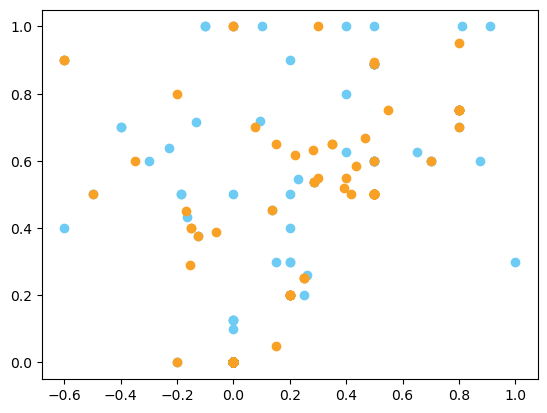

In [74]:
plt.scatter(sent_single_without['polarity'], sent_single_without['subjectivity'], color=colors[0])
plt.scatter(sent_single_with['polarity'], sent_single_with['subjectivity'], color=colors[1])
# plt.legend(["without agent", "with agent"], loc ="lower right") 
# plt.title('Sentiment Analysis of Conversation')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')

# Show the plot
plt.show()

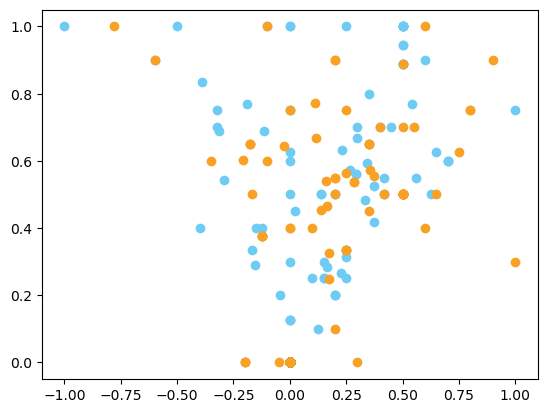

In [75]:
plt.scatter(sent_multi_without['polarity'], sent_multi_without['subjectivity'], color=colors[0])
plt.scatter(sent_multi_with['polarity'], sent_multi_with['subjectivity'], color=colors[1])
# plt.legend(["without agent", "with agent"], loc ="lower right") 
# plt.title('Sentiment Analysis of Group Chat')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')

# Show the plot
plt.show()

In [163]:
# p_value all larger than 0.05, so we don't think agent change polarity or subjectivity
print("single - polarity:   ", stats.mannwhitneyu(sent_single_without['polarity'], sent_single_with['polarity']))
print("single - subjectivity:   ", stats.mannwhitneyu(sent_single_without['subjectivity'], sent_single_with['subjectivity']))
print("multi - polarity:   ", stats.mannwhitneyu(sent_multi_without['polarity'], sent_single_with['polarity']))
print("multi - subjectivity:   ", stats.mannwhitneyu(sent_multi_without['subjectivity'], sent_single_with['subjectivity']))

single - polarity:    MannwhitneyuResult(statistic=12672.5, pvalue=0.8690236660922628)
single - subjectivity:    MannwhitneyuResult(statistic=12820.0, pvalue=0.7197149100546341)
multi - polarity:    MannwhitneyuResult(statistic=13182.5, pvalue=0.7887715169198106)
multi - subjectivity:    MannwhitneyuResult(statistic=14482.5, pvalue=0.17641619586799806)


### conversation vs group chat

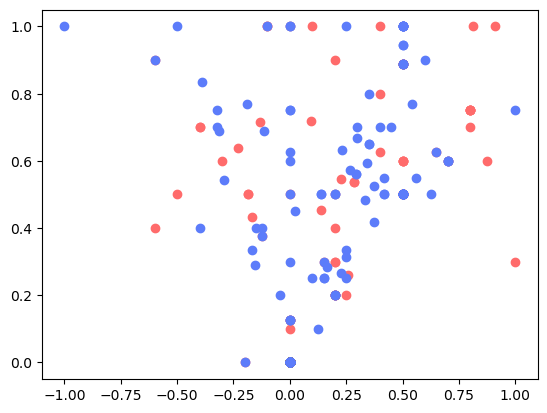

In [80]:
plt.scatter(sent_single_without['polarity'], sent_single_without['subjectivity'], color=colors2[0])
plt.scatter(sent_multi_without['polarity'], sent_multi_without['subjectivity'], color=colors2[1])
# plt.legend(["without agent", "with agent"], loc ="lower right") 
# plt.title('Sentiment Analysis of Conversation')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')

# Show the plot
plt.show()

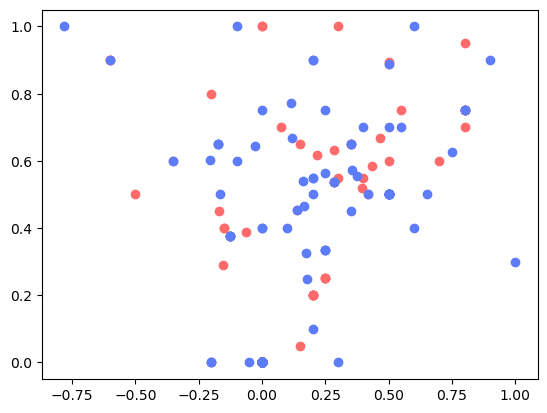

In [81]:
plt.scatter(sent_single_with['polarity'], sent_single_with['subjectivity'], color=colors2[0])
plt.scatter(sent_multi_with['polarity'], sent_multi_with['subjectivity'], color=colors2[1])
# plt.legend(["without agent", "with agent"], loc ="lower right") 
# plt.title('Sentiment Analysis of Conversation')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')

# Show the plot
plt.show()

In [107]:
# p_value all larger than 0.05, so we don't think grouchat change polarity or subjectivity
print("no_agent - polarity:   ", stats.mannwhitneyu(sent_single_without['polarity'], sent_multi_without['polarity']))
print("no_agent - subjectivity:   ", stats.mannwhitneyu(sent_single_without['subjectivity'], sent_multi_without['subjectivity']))
print("agent - polarity:   ", stats.mannwhitneyu(sent_single_with['polarity'], sent_multi_with['polarity']))
print("agent - subjectivity:   ", stats.mannwhitneyu(sent_single_with['subjectivity'], sent_multi_with['subjectivity']))

no_agent - polarity:    MannwhitneyuResult(statistic=17344.0, pvalue=0.6429469157912864)
no_agent - subjectivity:    MannwhitneyuResult(statistic=15932.0, pvalue=0.3055137035272154)
agent - polarity:    MannwhitneyuResult(statistic=11238.5, pvalue=0.36996356039148315)
agent - subjectivity:    MannwhitneyuResult(statistic=10658.0, pvalue=0.9855120371077102)


## number of messages per conversation

In [146]:
# based on following result, we don't think agent or group chat improvde user engagement in each chatiing

In [13]:
def get_user_message_count_single(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["role"] == "user"] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths.append(len(msg_list))
    return user_message_lengths

roles = [ "Harry", "Geralt", "Lin"]
def get_user_message_count_multi(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["speaker"] in roles] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths.append(len(msg_list))
    return user_message_lengths

count_msg_single_without = get_user_message_count_single(single_without)
count_msg_single_with = get_user_message_count_single(single_with)
count_msg_multi_without = get_user_message_count_multi(multi_without)
count_msg_multi_with = get_user_message_count_multi(multi_with)

count_msg_lists = {"count_msg_single_without":count_msg_single_without, "count_msg_single_with":count_msg_single_with, 
             "count_msg_multi_without":count_msg_multi_without, "count_msg_multi_with":count_msg_multi_with}

In [14]:
# test if normal distribution
# if p is > 0.05, we assume it is normal distribution, therefore, for don't think it belongs to t_test
for cat in count_msg_lists:
    stat, p = stats.shapiro(count_msg_lists[cat])
    print("Type:", cat , "   P_value:",p)

Type: count_msg_single_without    P_value: 6.611700882785954e-06
Type: count_msg_single_with    P_value: 0.00025015592109411955
Type: count_msg_multi_without    P_value: 0.0003388656477909535
Type: count_msg_multi_with    P_value: 0.0011399361537769437


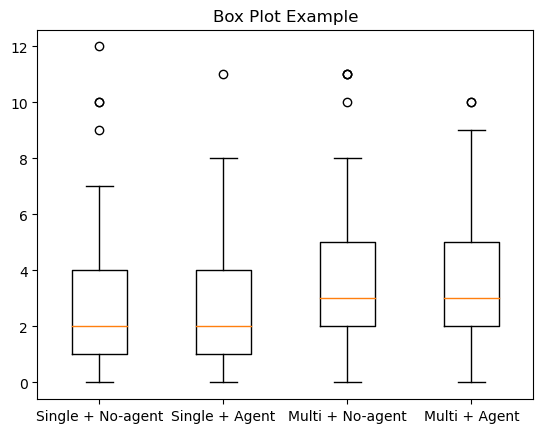

In [166]:
fig, ax = plt.subplots()

# Creating box plot
ax.boxplot([count_msg_single_without, count_msg_single_with, count_msg_multi_without,count_msg_multi_with])

# Adding titles and labels
ax.set_title('Box Plot Example')
ax.set_xticklabels(['Single + No-agent', 'Single + Agent','Multi + No-agent', 'Multi + Agent'])

# Showing the plot
plt.show()

In [119]:
print("U-test--agent vs no_agent-- conversation:   ", stats.mannwhitneyu(count_msg_single_without, count_msg_single_with) )
print("U-test--agent vs no_agent-- group chat:     ", stats.mannwhitneyu(count_msg_multi_without, count_msg_multi_with) )

U-test--agent vs no_agent-- conversation:    MannwhitneyuResult(statistic=1583.0, pvalue=0.6355045971055463)
U-test--agent vs no_agent-- group chat:      MannwhitneyuResult(statistic=1059.0, pvalue=0.9595464703748684)


In [120]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(count_msg_single_without, count_msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(count_msg_single_with, count_msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=1352.0, pvalue=0.2784424466008236)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=862.0, pvalue=0.14591846995023908)


## combine

### message length

In [15]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(msg_single_without, msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(msg_single_with, msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=12018.5, pvalue=1.6090448408022327e-06)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=6189.5, pvalue=6.391351270370662e-10)


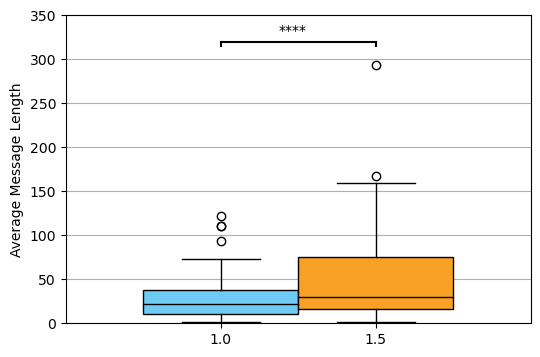

In [40]:
xr = [1, 1.5]
sg_height = 320
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim(0,350)
box = ax.boxplot([msg_single_without, msg_multi_without], positions=xr, widths=0.5, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('black')

# Draw the small vertical line at each end
vertical_height = 5
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.23, 325, "****", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Message Length')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

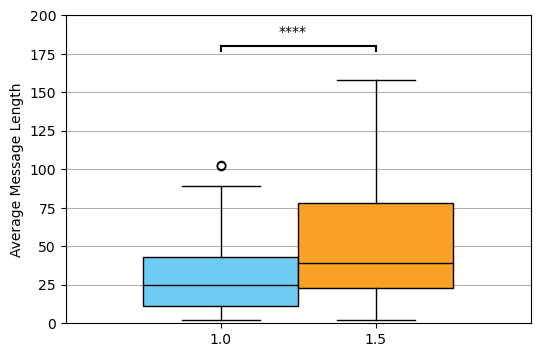

In [41]:
xr = [1, 1.5]
sg_height = 180
fig, ax = plt.subplots(figsize=(6,4))
ax.set_ylim(0,200)
box = ax.boxplot([msg_single_with, msg_multi_with], positions=xr, widths=0.5, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('black')

# Draw the small vertical line at each end
vertical_height = 3
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.23, 185, "****", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Message Length')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

### word counts

In [204]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(words_msg_single_without, words_msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(words_msg_single_with, words_msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=12376.5, pvalue=8.054889929239053e-06)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=6393.0, pvalue=3.397900112085238e-09)


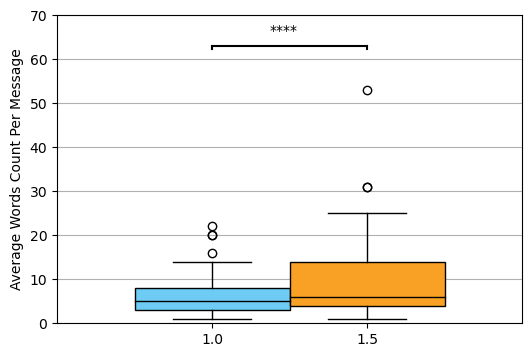

In [45]:
xr = [1, 1.5]
sg_height = 63
fig, ax = plt.subplots(figsize=(6,4))
ax.set_ylim(0,70)
box = ax.boxplot([words_msg_single_without, words_msg_multi_without], positions=xr, widths=0.5, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('black')

# Draw the small vertical line at each end
vertical_height = 0.7
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.23, 65, "****", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Words Count Per Message')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

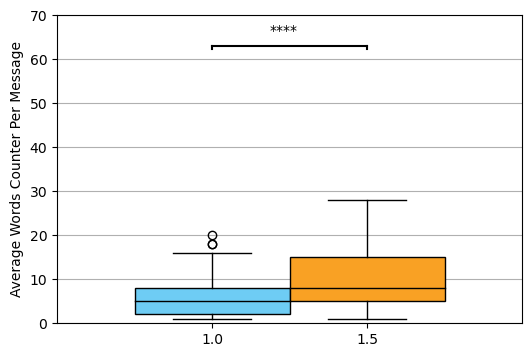

In [46]:
xr = [1, 1.5]
sg_height = 63
fig, ax = plt.subplots(figsize=(6,4))
ax.set_ylim(0,70)
box = ax.boxplot([words_msg_single_with, words_msg_multi_with], positions=xr, widths=0.5, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('black')

# Draw the small vertical line at each end
vertical_height = 0.7
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.23, 65, "****", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Words Counter Per Message')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

### number of messages

In [29]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(count_msg_single_without, count_msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(count_msg_single_with, count_msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=1352.0, pvalue=0.2784424466008236)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=862.0, pvalue=0.14591846995023908)


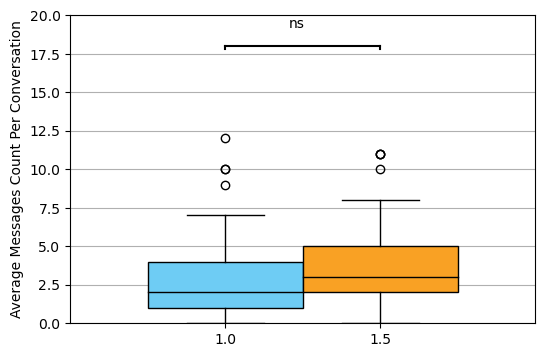

In [47]:
xr = [1, 1.5]
sg_height = 18
fig, ax = plt.subplots(figsize=(6,4))
ax.set_ylim(0,20)
box = ax.boxplot([count_msg_single_without, count_msg_multi_without], positions=xr, widths=0.5, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('black')

# Draw the small vertical line at each end
vertical_height = 0.2
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.23, 19, "ns", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Messages Count Per Conversation')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

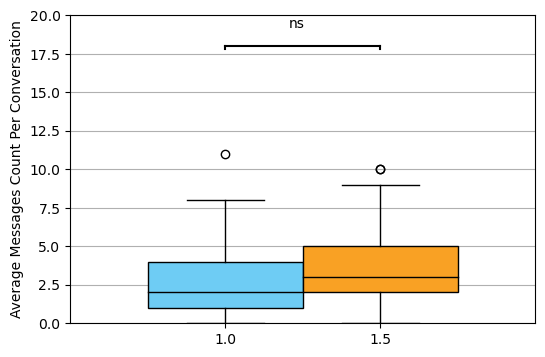

In [49]:
xr = [1, 1.5]
sg_height = 18
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim(0,20)
box = ax.boxplot([count_msg_single_with, count_msg_multi_with], positions=xr, widths=0.5, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
for median in box['medians']:
    median.set_color('black')

# Draw the small vertical line at each end
vertical_height = 0.2
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.23, 19, "ns", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Messages Count Per Conversation')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

# Narration Arc and Cognition Tension

In [51]:
count = 0
for index in no_sages:
    count += 1
    filename = "stories/story"+ str(count) + "_no_sage_" + str(index) +  ".txt" 
    with open(filename, "w") as f:
        d = data[index]["playdata"]
        for i in range(len(d)):
            f.write(d[i]["story"])
    f.close()

for index in with_sages:
    count += 1
    filename = "stories/story"+ str(count) + "_sage_" + str(index) +  ".txt" 
    with open(filename, "w") as f:
        d = data[index]["playdata"]
        for i in range(len(d)):
            f.write(d[i]["story"])
    f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'stories/story1_no_sage_1.txt'

In [53]:
df_nar = pd.read_csv("LIWC-22 Results - 38 File(s) - Narrative Arc Table.csv")
df_nar = df_nar.dropna()

In [54]:
df_nar.head()

,Filename,WC,Narrativity_Overall,Narrativity_Staging,Narrativity_PlotProg,Narrativity_CogTension,Staging_1,Staging_2,Staging_3,Staging_4,...,CogTension_1,CogTension_2,CogTension_3,CogTension_4,CogTension_5,CogTension_6,CogTension_7,CogTension_8,CogTension_9,CogTension_10
0,story1_no_sage_1.txt,1660,27.67,49.11,-4.93,38.82,73.68,47.37,100.00,57.89,...,0.00,53.85,46.15,53.85,61.54,38.46,46.15,100.00,23.08,23.08
2,story3_no_sage_6.txt,925,26.84,48.59,5.07,26.86,55.63,100.00,85.21,70.42,...,24.53,49.07,73.60,0.00,49.07,75.20,100.00,100.00,25.60,25.60
3,story4_no_sage_9.txt,1656,6.84,10.43,1.41,8.67,15.66,6.63,42.77,42.77,...,66.67,83.33,91.67,100.00,58.33,0.00,75.51,67.12,58.74,41.97
4,story5_no_sage_11.txt,1639,26.81,47.37,-0.13,33.19,64.71,23.53,17.65,100.00,...,0.00,30.77,92.31,15.38,100.00,92.31,46.15,15.38,84.62,0.38
5,story6_no_sage_13.txt,1137,28.09,43.36,18.15,22.76,48.71,97.41,40.59,8.12,...,0.00,12.50,62.50,25.00,62.50,100.00,100.00,50.77,38.16,76.00


In [55]:
df_nar_no_sage = df_nar.iloc[0:18,]
df_nar_sage = df_nar.iloc[18:,]
df_nar_sage

,Filename,WC,Narrativity_Overall,Narrativity_Staging,Narrativity_PlotProg,Narrativity_CogTension,Staging_1,Staging_2,Staging_3,Staging_4,...,CogTension_1,CogTension_2,CogTension_3,CogTension_4,CogTension_5,CogTension_6,CogTension_7,CogTension_8,CogTension_9,CogTension_10
19,story20_sage_2.txt,313,17.45,53.13,9.37,-10.15,100.00,38.00,79.33,85.33,...,0.00,0.00,0.00,3.03,3.03,3.03,100.00,100.00,3.03,100.00
20,story21_sage_5.txt,1287,0.61,-8.92,2.61,8.15,0.00,36.06,72.11,60.09,...,0.00,70.00,100.00,30.00,30.00,20.00,30.00,20.55,20.55,70.94
21,story22_sage_7.txt,1193,26.18,39.13,13.52,25.91,70.15,52.12,16.06,27.27,...,10.65,65.74,76.76,100.00,22.22,77.78,22.22,55.56,0.00,22.22
22,story23_sage_10.txt,1815,19.22,52.76,-4.74,9.62,72.22,33.33,0.00,61.11,...,0.00,100.00,18.18,0.00,36.36,18.68,55.25,46.11,27.83,55.25
23,story24_sage_12.txt,1201,16.77,37.34,3.35,9.64,63.10,64.71,23.53,82.35,...,42.38,14.29,71.43,71.43,0.00,28.57,14.29,57.14,100.00,14.29
24,story25_sage_14.txt,986,19.14,52.92,3.27,1.23,64.47,0.00,53.73,75.22,...,0.00,24.65,12.33,73.96,36.98,61.64,75.09,0.38,75.09,100.00
25,story26_sage_17.txt,1275,35.29,78.23,42.48,-14.83,100.00,73.52,94.70,62.93,...,37.17,49.56,0.00,49.56,49.56,37.56,62.54,50.05,100.00,100.00
26,story27_sage_20.txt,2124,-11.60,-0.83,-6.50,-27.47,8.84,17.67,53.02,0.00,...,78.07,56.74,49.63,78.07,42.86,57.14,0.00,64.29,64.29,100.00
27,story28_sage_21.txt,782,8.82,40.01,6.17,-19.73,59.02,71.36,100.00,37.50,...,0.00,0.00,0.54,43.17,43.17,28.96,28.96,43.17,57.37,100.00
28,story29_sage_24.txt,736,9.40,44.76,-11.38,-5.17,66.16,32.33,66.16,66.16,...,100.00,79.95,39.84,59.89,79.95,79.95,40.66,81.32,0.00,20.33


## radar

[17.38222222 36.01388889  2.71777778 13.41166667 17.38222222]   [0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]
[17.03833333 40.41555556  6.16666667  4.535      17.03833333]   [0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]


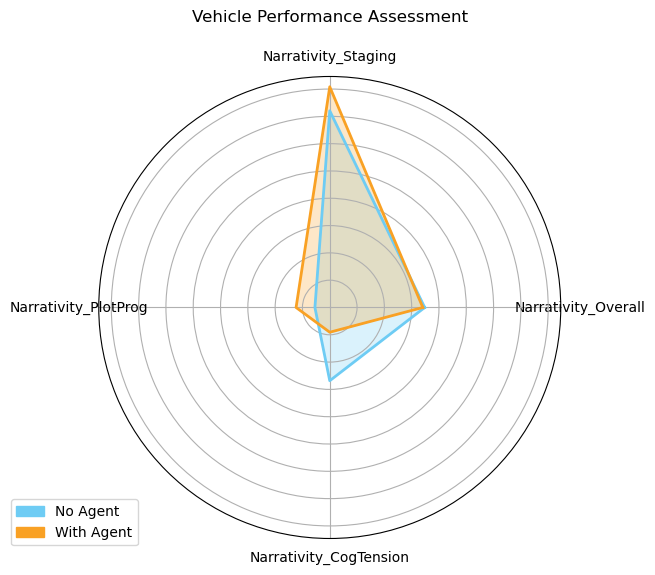

In [68]:
labels=np.array(['Narrativity_Overall', 'Narrativity_Staging', 'Narrativity_PlotProg', 'Narrativity_CogTension'])
data1=np.array([df_nar_no_sage["Narrativity_Overall"].mean(),
                df_nar_no_sage["Narrativity_Staging"].mean(),
                df_nar_no_sage["Narrativity_PlotProg"].mean(),
                df_nar_no_sage["Narrativity_CogTension"].mean(),
               ])
data2=np.array([df_nar_sage["Narrativity_Overall"].mean(),
                df_nar_sage["Narrativity_Staging"].mean(),
                df_nar_sage["Narrativity_PlotProg"].mean(),
                df_nar_sage["Narrativity_CogTension"].mean(),
               ])


def draw_radar(labels, *datas):
    # Create radar plot
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles+=angles[:1]

    # The plot is circular, so we need to "complete the loop" and append the start to the end.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    count = 0
    for data in datas:
        count += 1
        processed_data=np.concatenate((data,[data[0]]))
        
        print(processed_data, " ", angles)
        ax.fill(angles, processed_data, color=colors[count-1], alpha=0.25)
        ax.plot(angles, processed_data, color=colors[count-1], linewidth=2)  # Change the color if needed
        
    # ax.set_yticks([value for value in range(0, int(max(data1 + data2)), 15)]) # step is the interval between the grid lines
    

    # Labels for each point
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Title of the plot
    ax.set_title('Vehicle Performance Assessment', y=1.1)

    legend_patches = [
        mpatches.Patch(color=colors[0], label='No Agent'),
        mpatches.Patch(color=colors[1], label='With Agent')
    ]
    ax.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()
draw_radar(labels, data1, data2)

In [129]:
def draw_lines(labels, data1, data2):
    # Sample data

    #data1
    # Plotting the lines
    plt.plot(labels, data1[0], label='.25 Quantile', color="#fff")
    plt.plot(labels, data1[1], label='median', color=colors[0])
    plt.plot(labels, data1[2], label='.75 Quantile' , color="#fff")

    # Filling the area between the lines
    plt.fill_between(labels, data1[0],data1[1], color=colors[0], alpha=0.3)
    plt.fill_between(labels, data1[1], data1[2], color=colors[0], alpha=0.3)
    
    
    
    
    #Data2
    plt.plot(labels, data2[0], label='.25 Quantile', color="#fff")
    plt.plot(labels, data2[1], label='median', color=colors[1])
    plt.plot(labels, data2[2], label='.75 Quantile' , color="#fff")

    # Filling the area between the lines
    plt.fill_between(labels, data2[0],data2[1], color=colors[1], alpha=0.3)
    plt.fill_between(labels, data2[1], data2[2], color=colors[1], alpha=0.3)

    # Adding labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Line Plot with Filled Areas')
    plt.legend()

    # Display the plot
    plt.show()

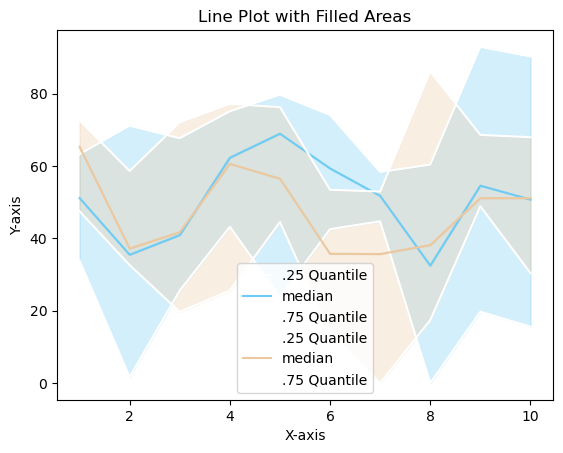

In [130]:
data_stage_no_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
data_stage_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
columns = ['Staging_1',
       'Staging_2', 'Staging_3', 'Staging_4', 'Staging_5', 'Staging_6',
       'Staging_7', 'Staging_8', 'Staging_9', 'Staging_10']
for c in columns:
    data_stage_no_agent[0].append(df_nar_no_sage[c].quantile(0.25))
    data_stage_no_agent[1].append(df_nar_no_sage[c].quantile(0.5))
    data_stage_no_agent[2].append(df_nar_no_sage[c].quantile(0.75))
    
    data_stage_agent[0].append(df_nar_sage[c].quantile(0.25))
    data_stage_agent[1].append(df_nar_sage[c].quantile(0.5))
    data_stage_agent[2].append(df_nar_sage[c].quantile(0.75))

draw_lines([1,2,3,4,5,6,7,8,9,10], data_stage_no_agent, data_stage_agent)

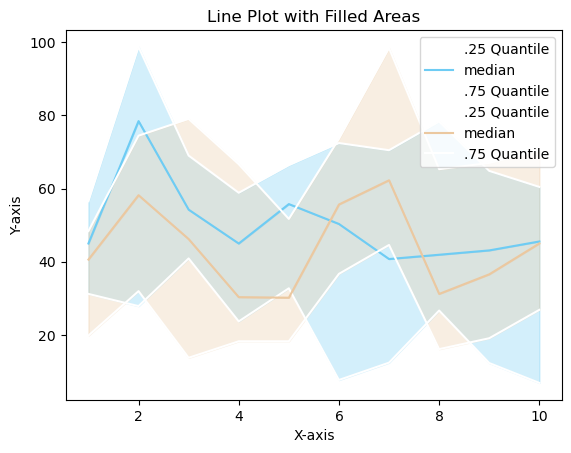

In [131]:
data_prog_no_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
data_prog_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
columns = ['PlotProg_1',
       'PlotProg_2', 'PlotProg_3', 'PlotProg_4', 'PlotProg_5', 'PlotProg_6',
       'PlotProg_7', 'PlotProg_8', 'PlotProg_9', 'PlotProg_10']
for c in columns:
    data_prog_no_agent[0].append(df_nar_no_sage[c].quantile(0.25))
    data_prog_no_agent[1].append(df_nar_no_sage[c].quantile(0.5))
    data_prog_no_agent[2].append(df_nar_no_sage[c].quantile(0.75))
    
    data_prog_agent[0].append(df_nar_sage[c].quantile(0.25))
    data_prog_agent[1].append(df_nar_sage[c].quantile(0.5))
    data_prog_agent[2].append(df_nar_sage[c].quantile(0.75))

draw_lines([1,2,3,4,5,6,7,8,9,10], data_prog_no_agent, data_prog_agent)

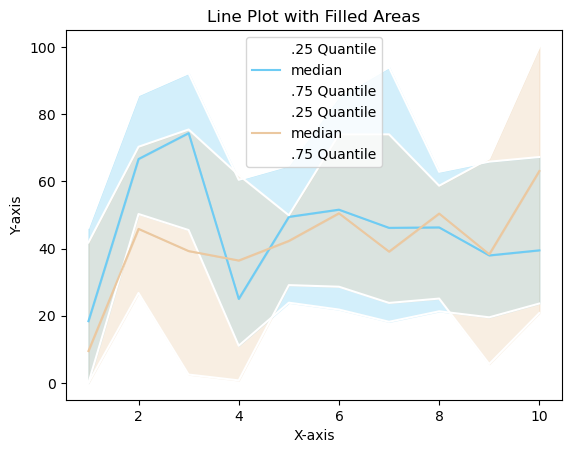

In [132]:
data_tension_no_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
data_tension_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
columns = ['CogTension_1',
       'CogTension_2', 'CogTension_3', 'CogTension_4', 'CogTension_5',
       'CogTension_6', 'CogTension_7', 'CogTension_8', 'CogTension_9',
       'CogTension_10']
for c in columns:
    data_tension_no_agent[0].append(df_nar_no_sage[c].quantile(0.25))
    data_tension_no_agent[1].append(df_nar_no_sage[c].quantile(0.5))
    data_tension_no_agent[2].append(df_nar_no_sage[c].quantile(0.75))
    
    data_tension_agent[0].append(df_nar_sage[c].quantile(0.25))
    data_tension_agent[1].append(df_nar_sage[c].quantile(0.5))
    data_tension_agent[2].append(df_nar_sage[c].quantile(0.75))

draw_lines([1,2,3,4,5,6,7,8,9,10], data_tension_no_agent, data_tension_agent)

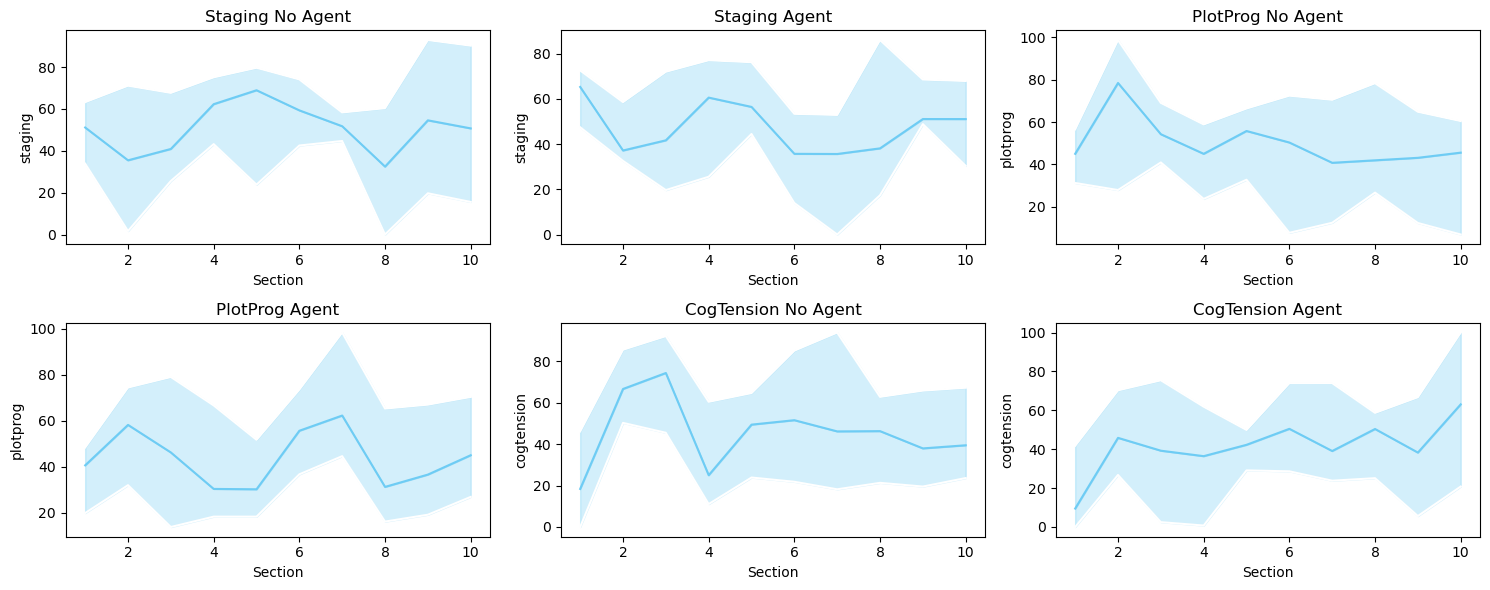

In [133]:
def draw_3_2_area_plot(x,titles,x_labels,y_labels ,*datas):
    plt.figure(figsize=(15, 6))
    
    count = 0
    for data in datas:
        count += 1
        plt.subplot(2, 3, count) 
        plt.plot(x, data[0], label='.25 Quantile', color="#fff")
        plt.plot(x, data[1], label='median', color=colors[0])
        plt.plot(x, data[2], label='.75 Quantile' , color="#fff")
        plt.fill_between(x, data[0], data[1], color=colors[0], alpha=0.3)
        plt.fill_between(x, data[1], data[2], color=colors[0], alpha=0.3)
        
        plt.title(titles[count - 1])
        plt.xlabel(x_labels[count - 1])
        plt.ylabel(y_labels[count - 1])
    
    plt.tight_layout()

    # Display the plot
    plt.show()
    
draw_3_2_area_plot([1,2,3,4,5,6,7,8,9,10],
                   ["Staging No Agent","Staging Agent","PlotProg No Agent","PlotProg Agent","CogTension No Agent","CogTension Agent" ],
                   ["Section"]*6,
                   ["staging", "staging", "plotprog", "plotprog", "cogtension","cogtension"] ,
                   data_stage_no_agent,
                   data_stage_agent,
                   data_prog_no_agent,
                   data_prog_agent,
                   data_tension_no_agent,
                   data_tension_agent
                  )

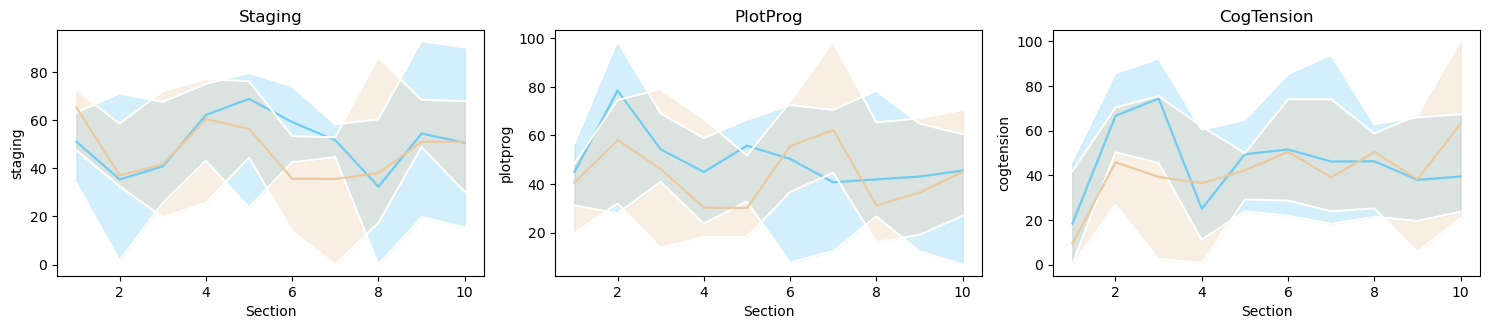

In [126]:
def draw_3_1_area_plot(x,titles,x_labels,y_labels ,*datas):
    plt.figure(figsize=(15, 6))
    
    for i in range(0,6,2):
        plt.subplot(2, 3, i//2 + 1) 
        plt.plot(x, datas[i][0], label='.25 Quantile', color="#fff")
        plt.plot(x, datas[i][1], label='median', color=colors[0])
        plt.plot(x, datas[i][2], label='.75 Quantile' , color="#fff")
        plt.fill_between(x, datas[i][0], datas[i][1], color=colors[0], alpha=0.3)
        plt.fill_between(x, datas[i][1], datas[i][2], color=colors[0], alpha=0.3)
        
        
        
        plt.plot(x, datas[i+1][0], label='.25 Quantile', color="#fff")
        plt.plot(x, datas[i+1][1], label='median', color=colors[1])
        plt.plot(x, datas[i+1][2], label='.75 Quantile' , color="#fff")
        plt.fill_between(x, datas[i+1][0], datas[i+1][1], color=colors[1], alpha=0.3)
        plt.fill_between(x, datas[i+1][1], datas[i+1][2], color=colors[1], alpha=0.3)
        
        plt.title(titles[i//2])
        plt.xlabel(x_labels[i//2])
        plt.ylabel(y_labels[i//2])
    
    plt.tight_layout()

    # Display the plot
    # fig.legend(lines, labels, loc='lower center', ncol=4)
    plt.show()
    
draw_3_1_area_plot([1,2,3,4,5,6,7,8,9,10],
                   ["Staging","PlotProg","CogTension"],
                   ["Section"]*3,
                   ["staging", "plotprog", "cogtension"] ,
                   data_stage_no_agent,
                   data_stage_agent,
                   data_prog_no_agent,
                   data_prog_agent,
                   data_tension_no_agent,
                   data_tension_agent
                  )